In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 100)
pd.set_option("max_colwidth", 200)

from sklearn import preprocessing
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import RepeatedKFold

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
ordinal = pd.read_csv('BaseOrdinal.csv')
ordinal.shape

(2580, 83)

In [3]:
ordinal = ordinal.drop(['Unnamed: 0', 'PID', 'Unnamed: 0.1'], axis=1)
ordinal.shape

(2580, 80)

In [4]:
X = ordinal.drop(['SalePrice'], axis=1)
y = ordinal.SalePrice

In [5]:
cb = CatBoostRegressor(random_state=1, verbose=False)
ridge = Ridge()
lasso = Lasso()

In [6]:
# Use cross-validation to evaluate model performance

def evaluate_model(model, X, y):
    
    # define the evaluation procedure
    cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
    
    # evaluate the model and collect the results
    scores = cross_validate(model, X, y, cv=cv, n_jobs=-1)
    
    #scores = cross_validate(model, X, y, scoring=scoring, 
    #                              cv=cv, n_jobs=-1) 
    
    df = pd.DataFrame(scores)
    
    return df

In [7]:
cat = evaluate_model(cb, X, y)

In [8]:
#cat

In [9]:
cat = cat[['test_score']].rename(columns={'test_score':'cat_score'})

In [10]:
cat

,cat_score
0,0.926950
1,0.898789
2,0.936517
3,0.929022
4,0.950638
5,0.936688
6,0.942846
7,0.926769
8,0.945508
9,0.884738


In [11]:
r = evaluate_model(ridge, X, y)

In [12]:
r = r[['test_score']].rename(columns={'test_score':'r_score'})

In [13]:
r

,r_score
0,0.881622
1,0.824189
2,0.880523
3,0.902566
4,0.915918
5,0.888084
6,0.895763
7,0.897448
8,0.908580
9,0.837339


In [14]:
l = evaluate_model(lasso, X, y)

In [15]:
l = l[['test_score']].rename(columns={'test_score':'l_score'})

In [16]:
l

,l_score
0,0.881715
1,0.824121
2,0.880326
3,0.902506
4,0.915206
5,0.887940
6,0.895557
7,0.897149
8,0.908568
9,0.837366


In [17]:
combo = pd.concat([cat, r, l], axis=1)

In [18]:
combo

,cat_score,r_score,l_score
0,0.926950,0.881622,0.881715
1,0.898789,0.824189,0.824121
2,0.936517,0.880523,0.880326
3,0.929022,0.902566,0.902506
4,0.950638,0.915918,0.915206
5,0.936688,0.888084,0.887940
6,0.942846,0.895763,0.895557
7,0.926769,0.897448,0.897149
8,0.945508,0.908580,0.908568
9,0.884738,0.837339,0.837366


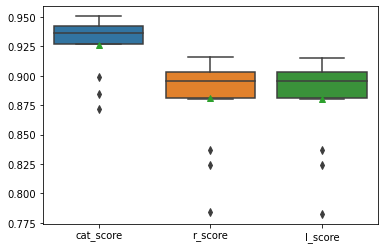

In [19]:
sns.boxplot(data=combo, showmeans=True);

In [20]:
combo.describe()

,cat_score,r_score,l_score
count,15.000000,15.000000,15.000000
mean,0.926683,0.880854,0.880602
std,0.023191,0.037075,0.037266
min,0.872051,0.784003,0.782503
25%,0.926860,0.881073,0.881021
50%,0.936517,0.895763,0.895557
75%,0.942064,0.903026,0.902965
max,0.950638,0.915918,0.915206
